In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean
import torch
from torchvision import datasets, transforms, models
from torch.autograd import Variable

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filePath='/content/drive/MyDrive/Soft Com Lab/Assignment 2/Dataset A/training-a'


In [4]:
datafile = pd.read_csv('/content/drive/MyDrive/Soft Com Lab/Assignment 2/Dataset A/training-a.csv')
datafile.columns
datafile = datafile.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
datafile.iloc[:10, 0:]

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
5,a00005.png,4
6,a00006.png,3
7,a00007.png,0
8,a00008.png,4
9,a00009.png,9


In [5]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [6]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(datafile, filePath, train_transform)
test_data = Dataset(datafile, filePath, test_transform)



In [7]:
learning_rate = 0.01 
batch_size = 20
num_iters = 20000
input_dim = 128*128
num_hidden = 200 
output_dim = 10
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
trainloader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True) 

testloader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [8]:
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

np.random.seed(0)
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn


In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(16384, 8192)
        self.l2 = nn.Linear(8192, 4096)
        self.l3 = nn.Linear(4096, 2048)
        self.l4 = nn.Linear(2048, 1024)
        self.l5 = nn.Linear(1024, 512)
        self.l6 = nn.Linear(512, 256)
        self.l7 = nn.Linear(256, 10)
 
    def forward(self, x):
        ##
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        x = F.relu(self.l5(x))
        x = F.relu(self.l6(x))
        x = self.l7(x)
        x = F.log_softmax(x, dim=1)
        return x

model = NeuralNetwork()
model.to(device)

NeuralNetwork(
  (l1): Linear(in_features=16384, out_features=8192, bias=True)
  (l2): Linear(in_features=8192, out_features=4096, bias=True)
  (l3): Linear(in_features=4096, out_features=2048, bias=True)
  (l4): Linear(in_features=2048, out_features=1024, bias=True)
  (l5): Linear(in_features=1024, out_features=512, bias=True)
  (l6): Linear(in_features=512, out_features=256, bias=True)
  (l7): Linear(in_features=256, out_features=10, bias=True)
)

In [10]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
Loss = []
iterationNo=0;
iterations= []
for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        ##
        images = images.view(-1, 128*128).to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        iterationNo = iterationNo + 1
        cum_loss += loss.item()
        if(iterationNo%100==0):
          Loss.append(cum_loss/len(trainloader))
          iterations.append(iterationNo)
          print(f"Training loss: {cum_loss/len(trainloader)}","Iteration ", iterationNo)
          
    

Training loss: 0.2335678696874189 Iteration  100
Training loss: 0.46721815119892296 Iteration  200
Training loss: 0.7006873646807719 Iteration  300
Training loss: 0.9340947119265977 Iteration  400
Training loss: 1.1675291404762809 Iteration  500
Training loss: 1.4010912114659864 Iteration  600
Training loss: 1.6346677324109338 Iteration  700
Training loss: 1.8681415271081983 Iteration  800
Training loss: 2.101711154709481 Iteration  900
Training loss: 0.03268397047843701 Iteration  1000
Training loss: 0.2661557966506989 Iteration  1100
Training loss: 0.4995833262952298 Iteration  1200
Training loss: 0.7330010616755147 Iteration  1300
Training loss: 0.9664080616910365 Iteration  1400
Training loss: 1.1998344321279932 Iteration  1500
Training loss: 1.4332275112550592 Iteration  1600
Training loss: 1.6666221239020327 Iteration  1700
Training loss: 1.9000132272499812 Iteration  1800
Training loss: 2.1333824495272995 Iteration  1900
Training loss: 0.06533078707255892 Iteration  2000
Trainin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

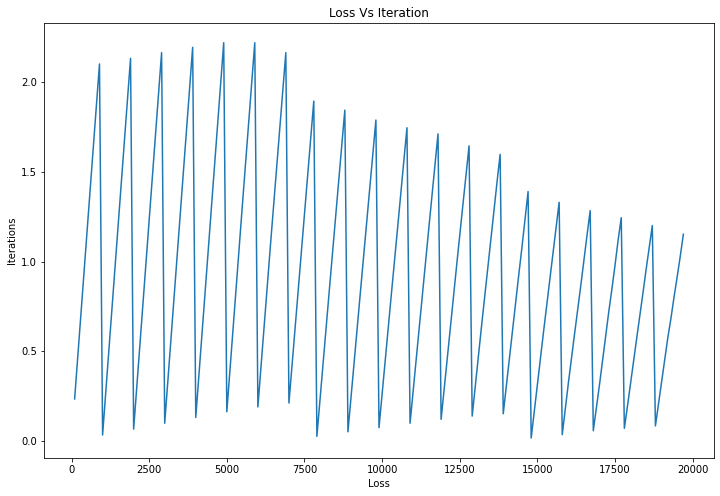

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
x= np.array(iterations)
y= np.array(Loss)
plt.plot(x, y)
plt.title("Loss Vs Iteration")
plt.xlabel("Loss")
plt.ylabel("Iterations")
from google.colab import files
plt.savefig("Loss Vs Iteration.png",dpi=199)

files.download("Loss Vs Iteration.png") 
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

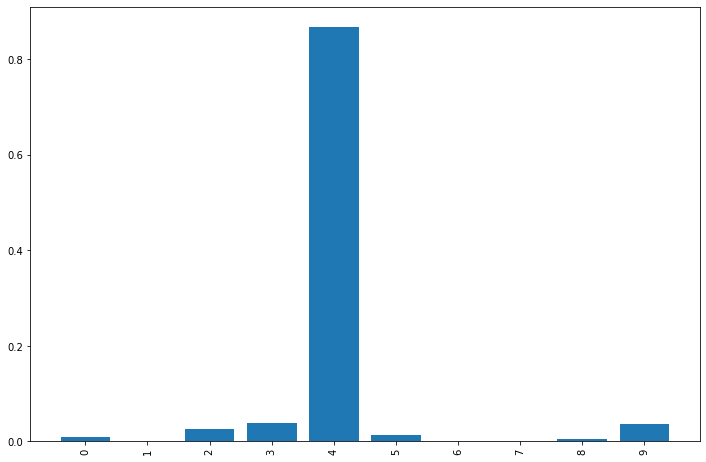

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

images, labels = next(iter(testloader))

img = images[5]
img = img.view(-1, 128*128)
lab = labels[5]

with torch.no_grad():
    CrossEntropyLoss = model(img)
ps = torch.exp(CrossEntropyLoss)
plt.rcParams["figure.figsize"] = (12, 8)
nps = ps.numpy()[0]
FMNIST_labels = ['0','1','2','3','4','5','6','7','8','9']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

from google.colab import files
plt.savefig("Probability.png",dpi=199)

files.download("Probability.png") 
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

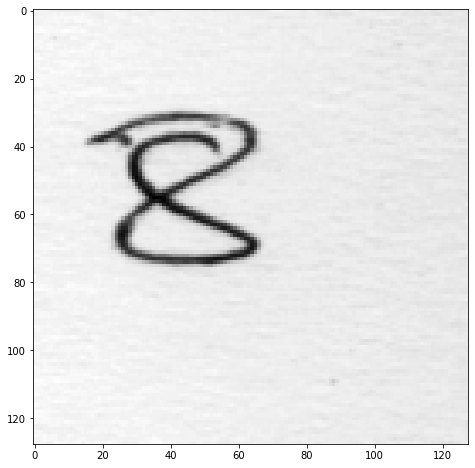

In [42]:
plt.rcParams["figure.figsize"] = (12, 8)

def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(128,-1)
img = denormalize(img)
from google.colab import files
plt.savefig("Actual.png",dpi=199)

files.download("Actual.png") 
plt.imshow(img,cmap='gray')

In [54]:
correct =0
for images, labels in testloader:
  images = images.view(-1, 128*128).to(device)
  outputs = model(images)
  _, predicted = torch.max(outputs, 1)
  total += labels.size(0)
  
  # Total correct predictions
  if torch.cuda.is_available():
      correct += (predicted.cpu() == labels.cpu()).sum() 
  else:
      correct += (predicted == labels).sum()
 
accuracy = 100 * correct.item() / total
print("Accuracy : " , f'{accuracy:.2f}',"%")

Accuracy :  56.28 %
